### Matplotlib Colormaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

Get some data

In [3]:
w = np.round(np.genfromtxt("vort_000050.dat", delimiter=" ")[1:,:], 6)

Plot the data with every possible colormaps

Accent


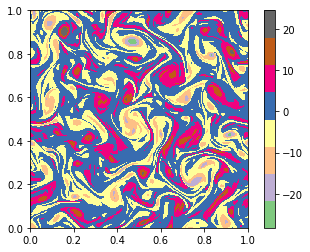

Blues


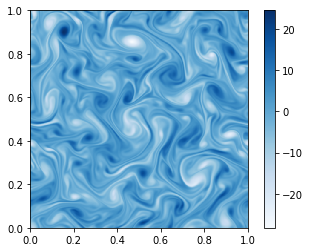

BrBG


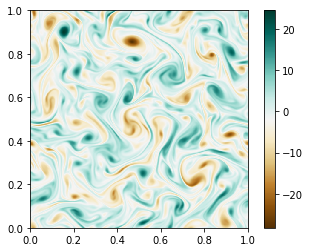

BuGn


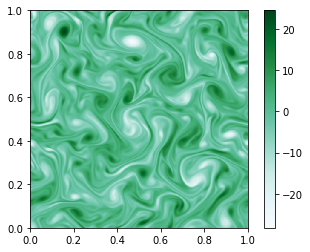

BuPu


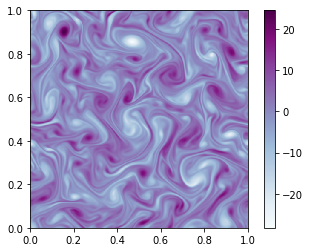

CMRmap


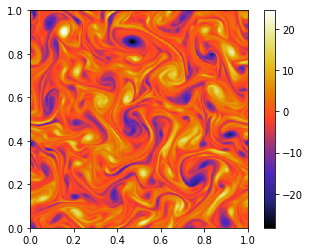

Dark2


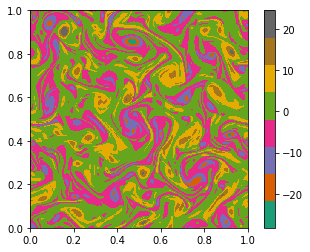

GnBu


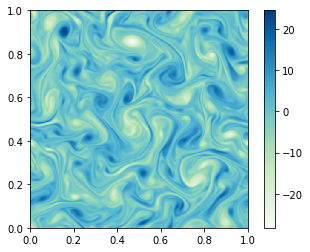

Greens


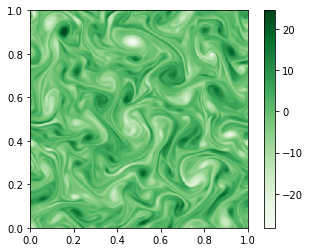

Greys


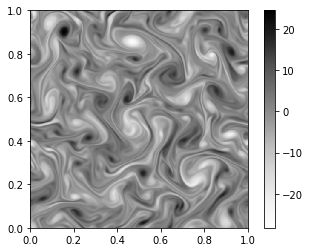

OrRd


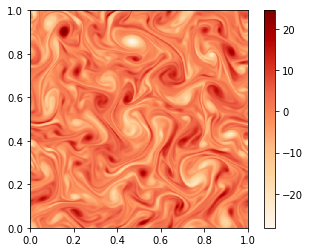

Oranges


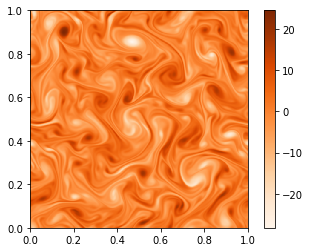

PRGn


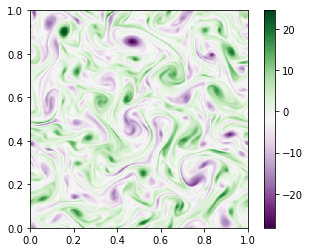

Paired


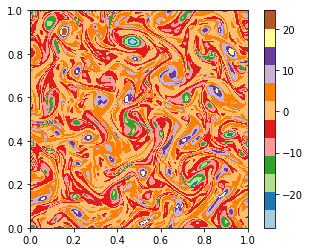

Pastel1


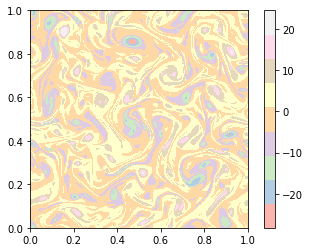

Pastel2


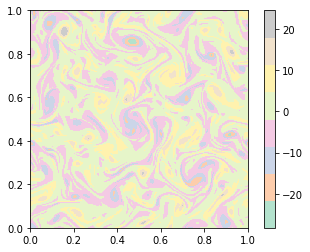

PiYG


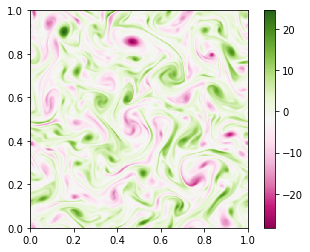

PuBu


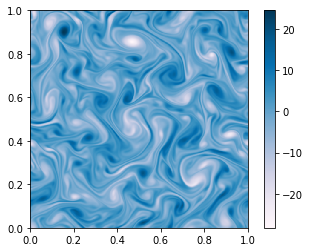

PuBuGn


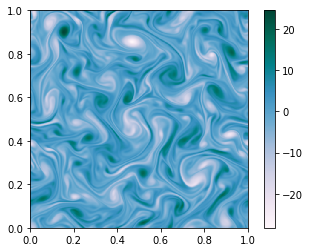

PuOr


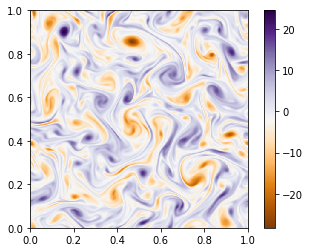

PuRd


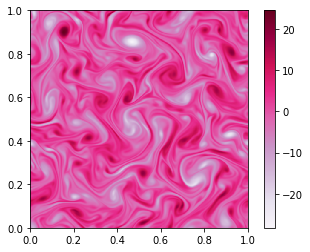

Purples


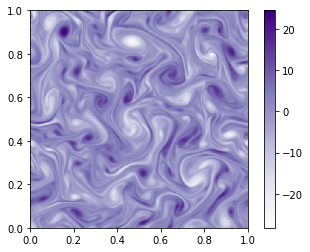

RdBu


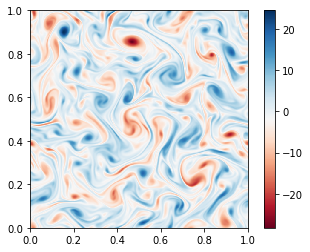

RdGy


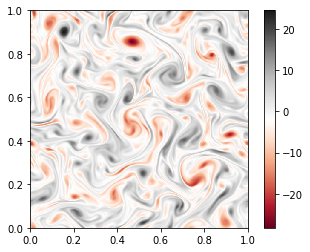

RdPu


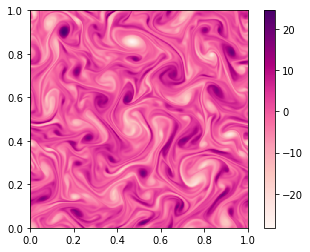

RdYlBu


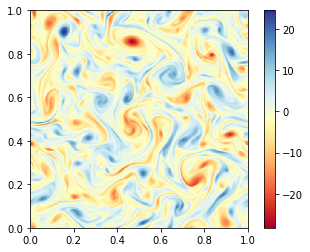

RdYlGn


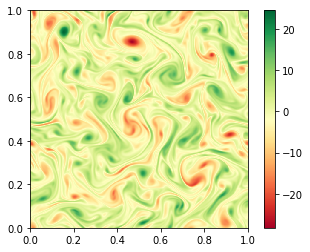

Reds


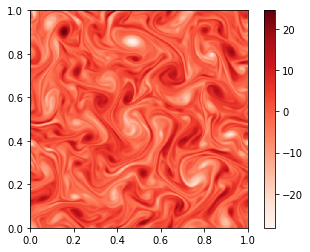

Set1


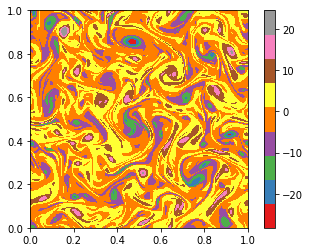

Set2


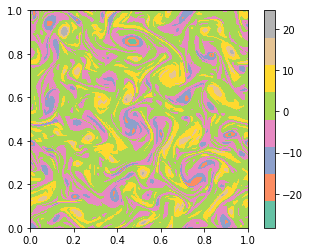

Set3


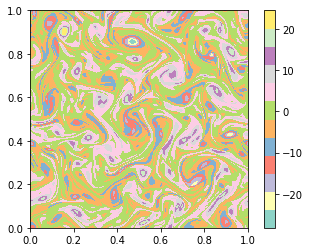

Spectral


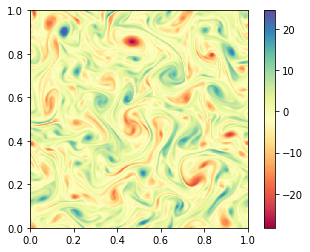

Wistia


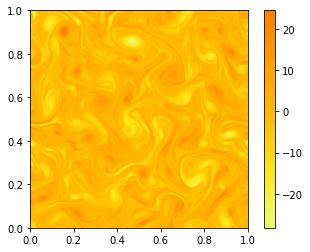

YlGn


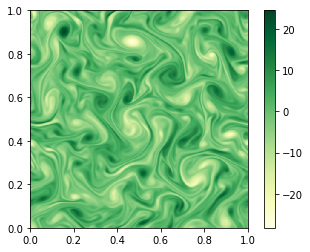

YlGnBu


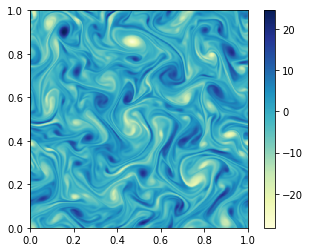

YlOrBr


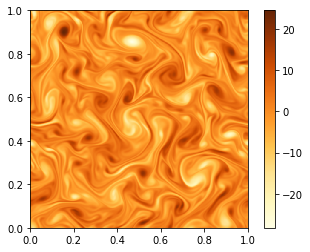

YlOrRd


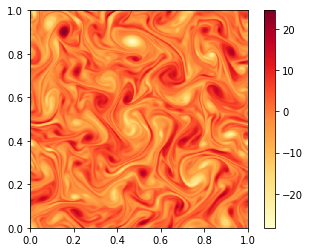

afmhot


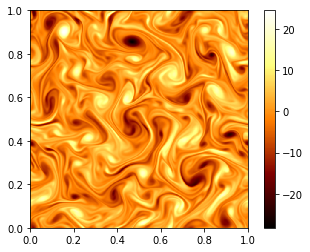

autumn


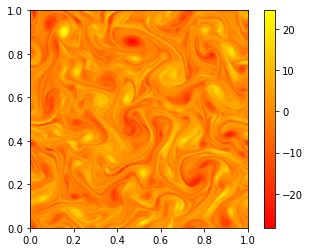

binary


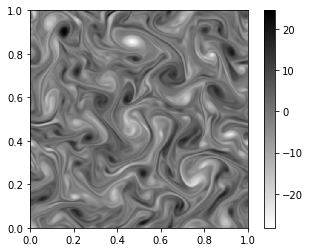

bone


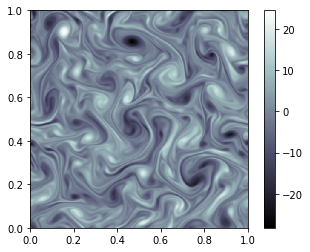

brg


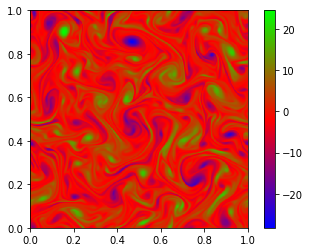

bwr


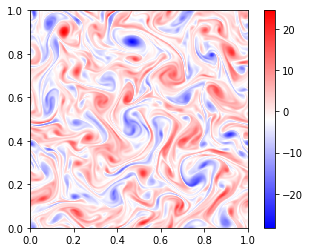

cividis


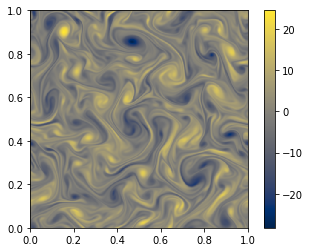

cool


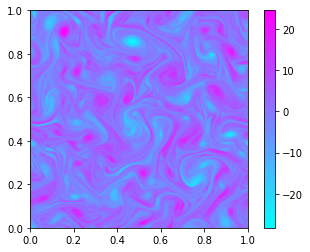

coolwarm


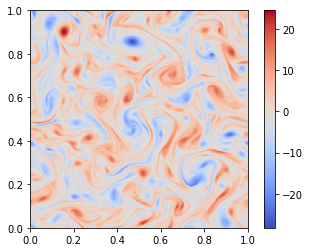

copper


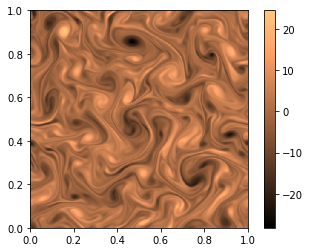

cubehelix


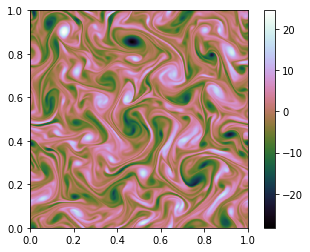

flag


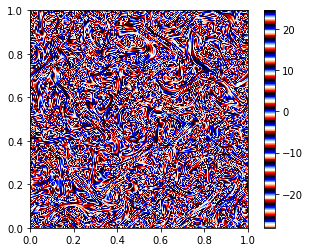

gist earth


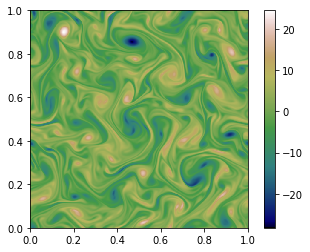

gist gray


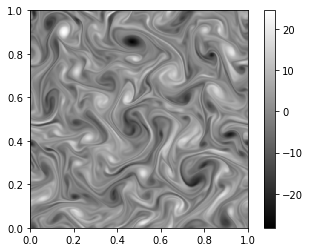

gist heat


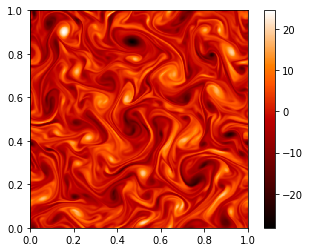

gist ncar


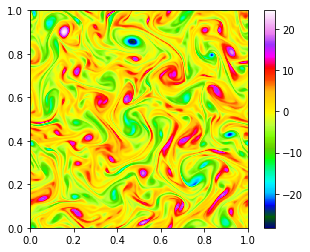

gist rainbow


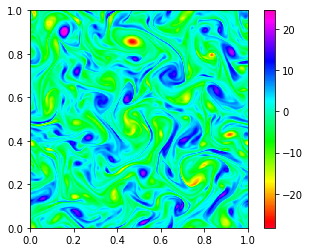

gist stern


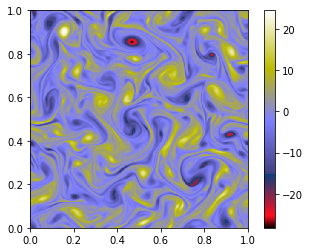

gist yarg


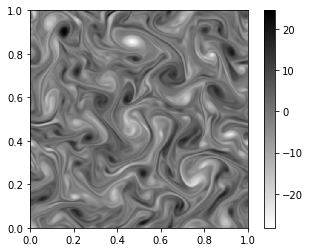

gnuplot


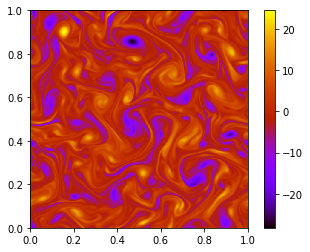

gnuplot2


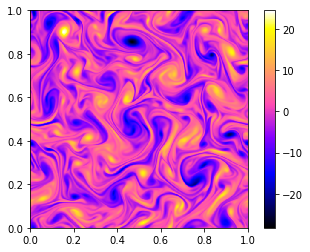

gray


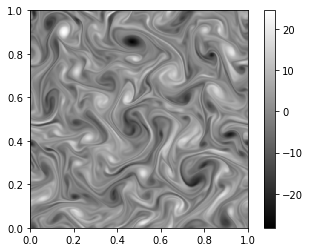

hot


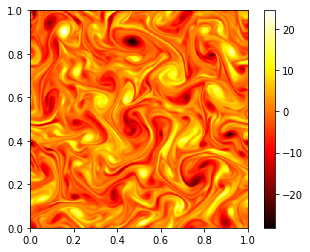

hsv


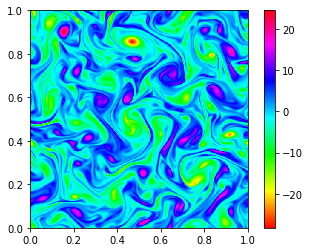

inferno


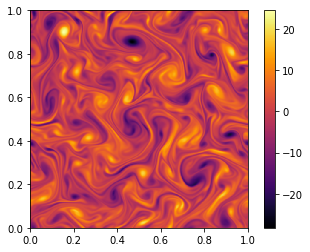

jet


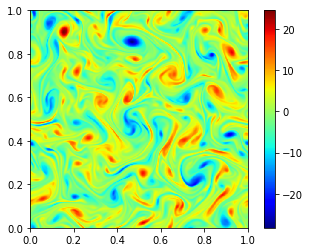

magma


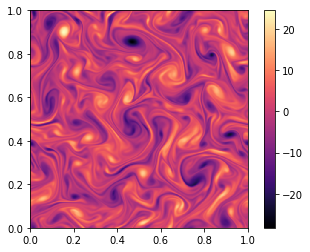

nipy spectral


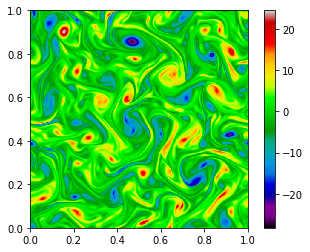

ocean


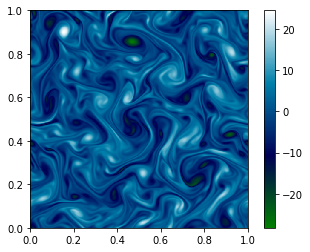

pink


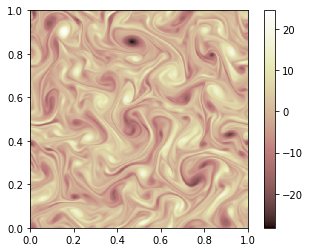

plasma


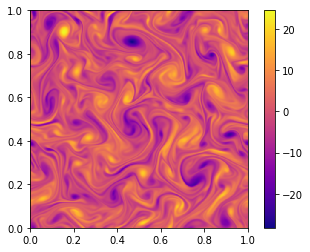

prism


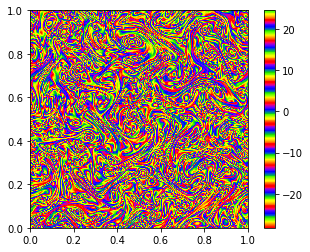

rainbow


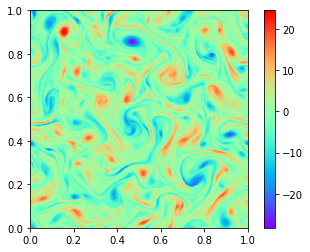

seismic


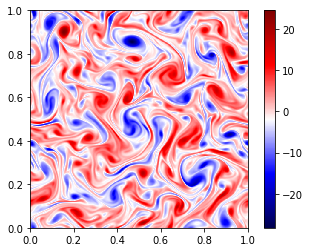

spring


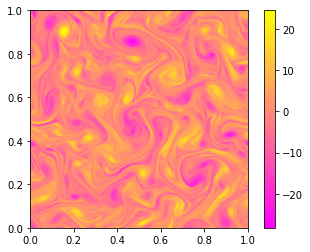

summer


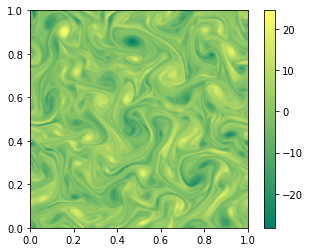

tab10


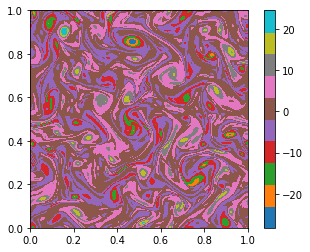

tab20


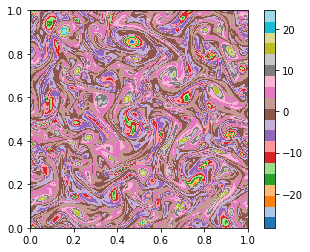

tab20b


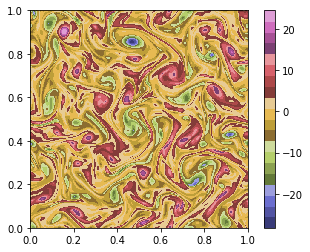

tab20c


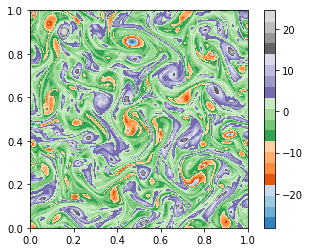

terrain


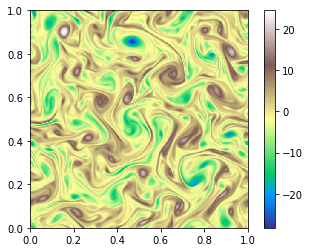

twilight


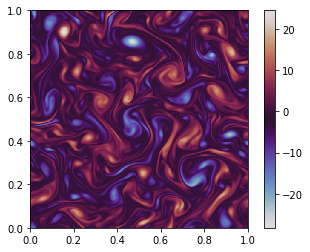

twilight shifted


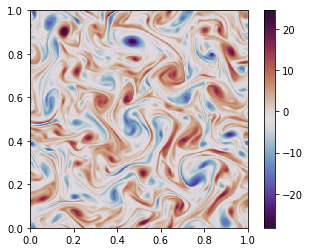

viridis


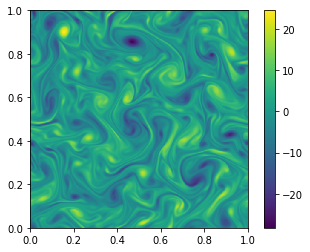

winter


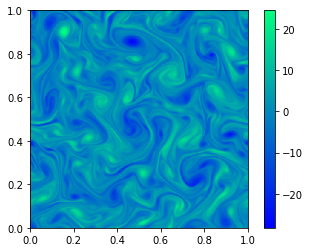

In [4]:
for m in sorted(m for m in plt.colormaps() if not m.endswith("_r")):
    print(m.replace("_", " "))    
    plt.imshow(w,cmap=m,extent=[0,1,0,1])
    plt.colorbar()
    plt.show()

Done

In [5]:
viridis = cm.get_cmap('viridis', 256)
viridis(range(256))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       ...,
       [0.974417, 0.90359 , 0.130215, 1.      ],
       [0.983868, 0.904867, 0.136897, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [6]:
newcolors = viridis(range(128))
newcmp = ListedColormap(newcolors)

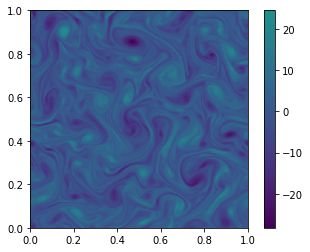

In [7]:
plt.imshow(w,cmap=newcmp,extent=[0,1,0,1])
plt.colorbar();

In [8]:
def plot_examples(cms, w):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.imshow(w, cmap=cmap, extent=[0,1,0,1])
        fig.colorbar(psm, ax=ax)
    plt.show()

In [9]:
def darken(colors, k=0.8):
    return np.where(k*colors[:,:3]>1., 1., k*colors[:,:3])

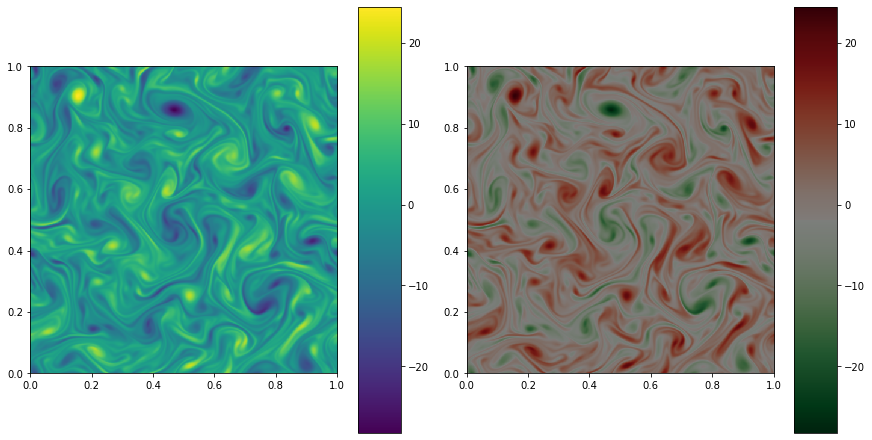

In [10]:
top = cm.get_cmap('Greens_r', 128)
bottom = cm.get_cmap('Reds', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(darken(newcolors, 0.5), name='OrangeBlue')
plot_examples([viridis, newcmp], w)

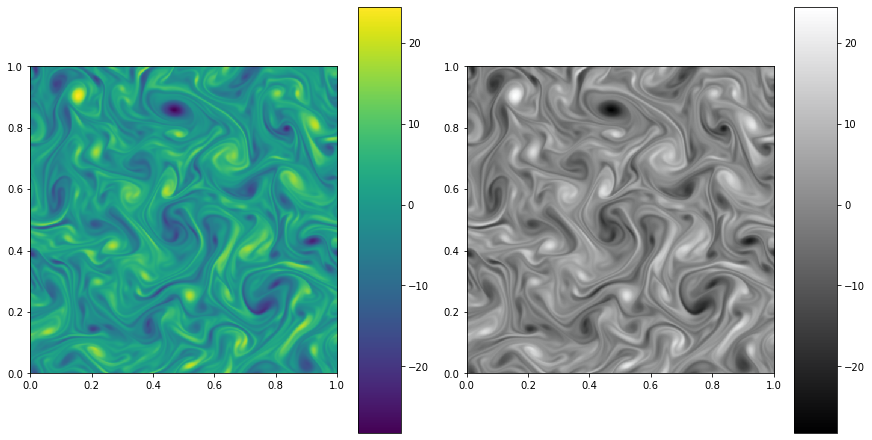

In [11]:
randcolors = np.linspace(0, 1, 4*128).reshape(128,4)
randcolors[:,3:] = 1.
newcmp = ListedColormap(randcolors, name='New')
plot_examples([viridis, newcmp], w)